In [22]:
# тестовая задачка для определения внутригрупповой суммы квадратов
# https://stepik.org/lesson/24820/step/6?unit=7111

import pandas as pd
from statistics import mean
import numpy as np

x=[-3,1,2,3,5,6,7]
y=[1,2,3,4,6,8,11]

df=pd.DataFrame({'x':x, 'y':y})
display(df)

# положение центроида для одного кластера
C=pd.DataFrame({'x': mean(df.x), 'y': mean(df.y)}, index=[0])
display(C)


# теперь считаем отклонения наблюдений от центроида и их сумму
total=[]
for i in range(0,len(df.x)):
    r=((df.x[i]-C.x)**2+(df.y[i]-C.y)**2)
    total.append(r)
print(sum(total))



,x,y
0,-3,1
1,1,2
2,2,3
3,3,4
4,5,6
5,6,8
6,7,11


,x,y
0,3,5


0    146
dtype: int64


,X1,X2,X3,X4,X5
0,11,7,10,10,8
1,9,10,10,8,6
2,9,2,12,14,11
3,9,11,8,10,3
4,7,9,10,11,14
5,9,11,9,6,9
6,16,20,22,19,16
7,23,18,21,24,16
8,15,21,14,21,21
9,19,20,15,17,17


,X1,X2,X3,X4,X5,labels
0,11,7,10,10,8,1
1,9,10,10,8,6,1
2,9,2,12,14,11,2
3,9,11,8,10,3,1
4,7,9,10,11,14,2
5,9,11,9,6,9,1
6,16,20,22,19,16,4
7,23,18,21,24,16,4
8,15,21,14,21,21,3
9,19,20,15,17,17,3


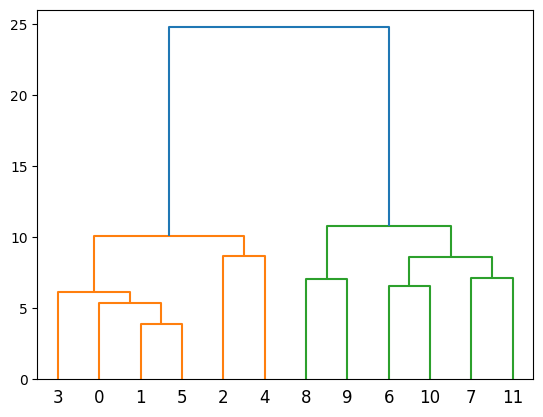

In [128]:
# https://stepik.org/lesson/26672/step/1?unit=8484
# построение ИЕРАРХИЧЕСКИХ кластеров

#Напишите функцию smart_hclust, которая получает на вход dataframe  с произвольным числом количественных 
#переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.
# Функция должна в исходный набор данных добавлять новую переменную фактор - cluster  -- номер кластера, 
#к которому отнесено каждое из наблюдений.

import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
data = pd.read_csv('https://stepic.org/media/attachments/course/524/test_data_hclust.csv')
display(data)

def smart_hclust(data):
    # Вычисляем матрицу расстояний
    Z = linkage(data, method='average', metric='euclidean')
    
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z, orientation='top')
    
    # Разбиваем на кластеры; 2й параметр - порог отсечения
    labels = fcluster(Z, 9.5, criterion='distance')
    data['labels'] = labels
    return data

display(smart_hclust(data))

# обрати внимание , что X1,X2,X3,X4,X5 - это всего лишь координаты каждого из 12 наблюдений (да, их пять координат)

 Введите число кластеров 
3


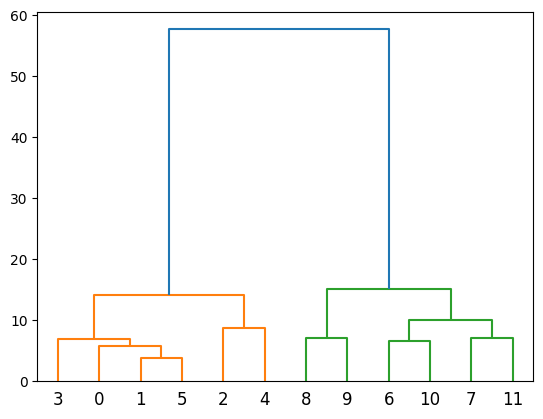

,X1,X2,X3,X4,X5,labels
0,11,7,10,10,8,0
1,9,10,10,8,6,0
2,9,2,12,14,11,0
3,9,11,8,10,3,0
4,7,9,10,11,14,0
5,9,11,9,6,9,0
6,16,20,22,19,16,1
7,23,18,21,24,16,1
8,15,21,14,21,21,2
9,19,20,15,17,17,2


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
def smart_hclust():
        df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_data_hclust.csv') 
        # читаем данные
        n = int(input(" Введите число кластеров \n")) 
        # запрашиваем число кластеров
        linkage_data = linkage(df, method='ward', metric='euclidean')
       
        # строим и выводим дендрограмму (df-это место, откуда берем данные; 
        # метод "ward" означет, что ищем наименьшие расстояния)
        dendrogram(linkage_data)
        plt.show()
        hierarchical_cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward') 
        
        # рассчитываем указанное количество кластеров (n_clusters=n)
        labels = hierarchical_cluster.fit_predict(df)
        # получаем новый nd.array с предсказаниями относительно кластера
        df['labels'] = labels
        # записываем предсказания в новый столбик df
        return df
    
display(smart_hclust())

In [93]:
# простой расчет эвлидовых расстоянияний

import math
  
# n-dimensional Point
  
# Coordinates of Point P
P = [11,7,34,22] 
  
# Coordinates of point Q
Q = [9,10,1,89]
  
# Calculate the Euclidean distance 
# between points P and Q
eDistance = math.dist(P, Q)
print(eDistance)

74.77298977572049


In [94]:
# вспомогательный код для проверки работы кода выше
import numpy as np
print(np.sqrt((11-9)**2+(7-10)**2+(34-1)**2+(22-89)**2))

74.77298977572049


In [135]:
# вспомогательный код для подсчета эвклидовых расстояний (построение матрицы расстояний)
df=pd.DataFrame({'x1':[11,9,9,9,7], 'x2':[7,10,2,17,9]})
display(df)

from scipy.spatial.distance import pdist, squareform
# матрица эвклидовых расстояний
distances = squareform(pdist(df.values, metric='euclidean'))
md=pd.DataFrame(distances)
display(md)

,x1,x2
0,11,7
1,9,10
2,9,2
3,9,17
4,7,9


,0,1,2,3,4
0,0.000000,3.605551,5.385165,10.198039,4.472136
1,3.605551,0.000000,8.000000,7.000000,2.236068
2,5.385165,8.000000,0.000000,15.000000,7.280110
3,10.198039,7.000000,15.000000,0.000000,8.246211
4,4.472136,2.236068,7.280110,8.246211,0.000000


,x1,x2
0,11,7
1,9,10
2,9,2
3,9,17
4,7,9


,x1,x2,labels
0,11,7,1
1,9,10,1
2,9,2,1
3,9,17,1
4,7,9,1


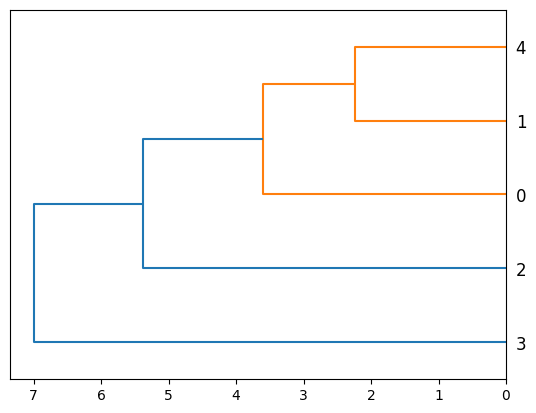

In [126]:
# вспомогательный код на простых dataframe чтобы понять как вообще составляется дендролес кластеров
# описание вручную - см в тетради
# описание аналогии - см википедия https://en.wikipedia.org/wiki/Complete-linkage_clustering

import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
df=pd.DataFrame({'x1':[11,9,9,9,7], 'x2':[7,10,2,17,9]})
display(df)

from scipy.spatial.distance import pdist, squareform
# матрица эвклидовых расстояний
#distances = squareform(pdist(df.values, metric='euclidean'))
#print(distances)


def smart_hclust(df):
    # Вычисляем матрицу расстояний
    Z = linkage(df, method='single', metric='euclidean')
    
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z, orientation='left')
    
    # Разбиваем на кластеры; 2й параметр t - порог отсечения: он влияет на показатель критерия
    # в данном случае критерий формирует кластеры так, чтобы исходные наблюдения в каждом кластере
    # имели кофенетическое расстояние не больше, чем t .
    # в данном случае максимальное кофенетическое расстояние (высота ветви дендродерева кластера) будет 15/2=7.5 
    # потому что 15 - максимальное расстояние между наблюдениями, значит ветвь вполовину короче
    # сама функция возвращает список значений с номерами кластеров
    labels = fcluster(Z, 7.5, criterion='distance')
    df['labels'] = labels
    return df

display(smart_hclust(df))

In [ ]:
# выясним чем отличаются кластеры между собой
# Напишите функцию get_difference, которая получает на вход два аргумента: 

# 1.test_data — набор данных с произвольным числом количественных переменных.
# 2.n_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.
# Функция должна вернуть названия переменных, по которым были обнаружен значимые различия 
#между выделенными кластерами (p < 0.05)﻿. Иными словами, после того, как мы выделили заданное 
#число кластеров, мы добавляем в исходные данные новую группирующую переменную — номер кластера,
#и сравниваем получившиеся группы между собой по количественным переменным при помощи дисперсионного анализа.




In [102]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.formula.api import ols

data=pd.read_csv("https://stepic.org/media/attachments/course/524/cluster_2.csv")

display(data)



,V1,V2
0,0.365838,1.261004
1,-0.152203,1.666559
2,-0.734094,1.471858
3,-0.781972,0.789316
4,0.551567,-0.036454
5,-1.610841,-0.091283
6,0.748176,-0.412863
7,0.449296,-0.781061
8,-0.870063,-0.390093
9,-0.097748,0.613838


,V1,V2,labels
0,0.365838,1.261004,1
1,-0.152203,1.666559,1
2,-0.734094,1.471858,1
3,-0.781972,0.789316,1
4,0.551567,-0.036454,1
5,-1.610841,-0.091283,1
6,0.748176,-0.412863,1
7,0.449296,-0.781061,1
8,-0.870063,-0.390093,1
9,-0.097748,0.613838,1


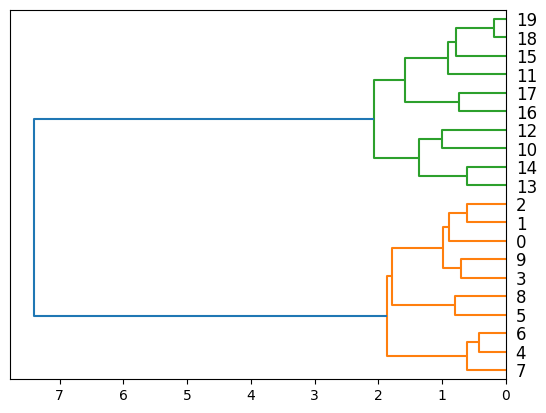

In [116]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.formula.api import ols

df=pd.read_csv("https://stepic.org/media/attachments/course/524/cluster_2.csv")


def get_difference(df):
  # Вычисляем матрицу расстояний
    Z = linkage(df, method='average', metric='euclidean')
    
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z, orientation='left')
    
    # Разбиваем на кластеры; 2й параметр - порог отсечения
    labels = fcluster(Z, 9.5, criterion='distance')
    df['labels'] = labels
    return df



display(get_difference(df))

In [ ]:
  sign_var = []
  for var in df.columns[:-1]:
    # Строка с формулой для подстановки в ols
    formula = (f'{var} ~ labels')
    # Получаем модель, записываем результат в таблицу
    lm = ols(formula, data=df).fit()
    table = sm.stats.anova_lm(lm)
    # Если p-value<0.05, значит кластеры имеют значимые различия по этой переменной
    if table['PR(>F)'].labels<0.05:
      sign_var.append(var)

  return sign_var

In [187]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_data_hclust.csv')
display(df)

from scipy.spatial.distance import pdist, squareform
# матрица эвклидовых расстояний
distances = squareform(pdist(df.values, metric='euclidean'))
md=pd.DataFrame(distances)
display(md)

#print(md[0].loc[md.index[4]]) # это локализовать значение из dataframe столбца 0 строки 4

M=[]
# создаем цикл по определению минимального значения
for i in md:
    # локализуем ВТОРОЕ наименьшее значение в каждом столбце i (первое наименьшее - это 0)
    minimal=md[i].nsmallest(2).iloc[[-1]] # исключаем из результатов 1 строку - там записан 0
    minimal=minimal.loc[minimal.index[0]] # убираем номер строки, он мешает записать результаты всех столбцов (перезаписываем число)
    M.append(minimal) # записываем результаты наименьших в массив M
print(min(M)) # выводим наименьшее значение из вторых наименьших

# найдем номер строки и столбца, в котором сидит это наименьшее число (это будет первый кластер)
for i in md: # пробежать все столбцы
    for j in md: # пробежать все строки
        if md[i].loc[md.index[j]]==min(M): #если значение в i-столбце j-строке равно минимальному - то:
            print('столбец: ',i,'\n', 'строка: ', j) # вывести значение столбца и строки

        



,X1,X2,X3,X4,X5
0,11,7,10,10,8
1,9,10,10,8,6
2,9,2,12,14,11
3,9,11,8,10,3
4,7,9,10,11,14
5,9,11,9,6,9
6,16,20,22,19,16
7,23,18,21,24,16
8,15,21,14,21,21
9,19,20,15,17,17


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,4.582576,7.615773,7.000000,7.549834,6.164414,21.977261,25.416530,22.759613,19.697716,26.683328,28.618176
1,4.582576,0.000000,11.357817,4.242641,8.831761,3.872983,22.671568,27.147744,23.811762,20.663978,27.404379,30.066593
2,7.615773,11.357817,0.000000,13.304135,8.660254,12.569805,22.869193,25.651511,23.452079,21.863211,28.035692,28.478062
3,7.000000,4.242641,13.304135,0.000000,11.575837,7.280110,24.000000,27.910571,24.839485,21.794495,28.548205,31.527766
4,7.549834,8.831761,8.660254,11.575837,0.000000,7.681146,20.346990,25.119713,19.313208,18.303005,24.919872,27.568098
5,6.164414,3.872983,12.569805,7.280110,7.681146,0.000000,22.737634,27.604347,23.021729,20.049938,27.018512,30.215890
6,21.977261,22.671568,22.869193,24.000000,20.346990,22.737634,0.000000,8.888194,9.746794,7.937254,6.557439,8.944272
7,25.416530,27.147744,25.651511,27.910571,25.119713,27.604347,8.888194,0.000000,12.489996,10.295630,8.366600,7.141428
8,22.759613,23.811762,23.452079,24.839485,19.313208,23.021729,9.746794,12.489996,0.000000,7.071068,9.380832,15.066519
9,19.697716,20.663978,21.863211,21.794495,18.303005,20.049938,7.937254,10.295630,7.071068,0.000000,8.124038,13.527749


3.872983346207417


In [130]:
import math
P = [11,7,10,10,8]   
Q = [9,10,10,8,6]
eDistance = math.dist(P, Q)
print(eDistance)

4.58257569495584
